# Importing the necessary packages and data


In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
main_df=pd.read_pickle('Data/df_of_imdb_data.pkl')

y=main_df['is_nominee']

# Making the train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(main_df.copy(),
                                                    y,
                                                       shuffle=True,
                                                       random_state=126029,
                                                       test_size=.2,
                                                       stratify=y
                                                   )

# Getting the lengths of producers and distributors lists

In [37]:
def get_lens_df(df):
    '''input the dataframe of movie info (df)
    outputs a dataframe:
    imdb_id, len(producers), len(distributors), nominee status'''
    lens_df= pd.DataFrame({'imdb_id': [],
                        'len_prod':[],
                        'len_dist':[] ,
                        'is_nominee':[]})
    for i in range(0, len(df)):
        row=df.iloc[i]
        newrow=[
            row['imdb_id'],
            len(row['producers']),
            len(row['distributors']),
            row['is_nominee']
                ]
        lens_df.loc[len(lens_df.index)] = newrow 
    return(lens_df)

In [39]:
lens_df = get_lens_df(X_train)

In [41]:
lens_df.head(15)

,imdb_id,len_prod,len_dist,is_nominee
0,2509428,1,1,0
1,0206367,6,7,0
2,5480816,3,5,0
3,0455142,4,13,0
4,11457742,0,0,0
5,6306568,2,0,0
6,7264946,3,0,0
7,11814526,0,1,0
8,19719738,0,0,0
9,0885415,13,25,0


# Visualizing the data

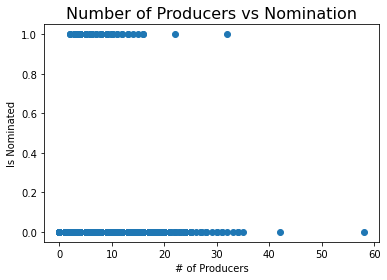

In [46]:
plt.scatter(lens_df['len_prod'],
           lens_df['is_nominee'])

plt.title("Number of Producers vs Nomination", fontsize=16)

plt.xlabel("# of Producers")
plt.ylabel('Is Nominated')

plt.show()

There does seem to be a sweet spot of 1-20 producers, but this data doesn't seem to suggest anything strong.  If anything, less producers is better.

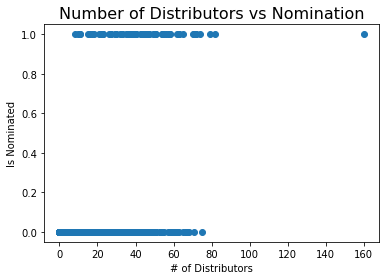

In [47]:
plt.scatter(lens_df['len_dist'],
           lens_df['is_nominee'])

plt.title("Number of Distributors vs Nomination", fontsize=16)

plt.xlabel("# of Distributors")
plt.ylabel('Is Nominated')

plt.show()

There's a slight correlation of more distributors to nomination status, and one very, very big outlier.

Who is that outlier?

In [48]:
lens_df[lens_df['len_dist']>120]

,imdb_id,len_prod,len_dist,is_nominee
1318,0126029,11,160,1


In [50]:
main_df[main_df['imdb_id']=='0126029']['titles']

15    Shrek
Name: titles, dtype: object

Of course it's Shrek.